## Whatsapp chat data Analysis

Since it a chat data (conversation) you might have guessed it right? No? Yes, of course it a text data which means yes of course you are right it NLP Natural Language Processing.

Let begin..

In [1]:
import wordcloud
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from ipywidgets import *

In [14]:
fontpath = None
from nltk.corpus import stopwords
import re
def calculate_frequencies(chat_history, mask=None):
    # decode text data
#     chat_history = chat_history[0].decode('utf-8')
    
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''1-9!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "on", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",\
    'pm', 'am', 'media', 'not', 'found', 'oh', 'so']
    
    # LEARNER CODE START HERE
    word_dict = {}
    new_s = [i.lower() for i in chat_history if i not in stopwords.words('english')]
    new_s = [i for i in chat_history if i.isalnum() or i.isalpha() or i.isspace()]
    word = ''.join(new_s)
    def remove_punctuation(s):
        return re.sub(r'[^\w 0-9]|_', '', s)
    word = remove_punctuation(word).split()
    for i in word:
        if i in uninteresting_words:
            pass    
        else:
            word_dict[i] = word_dict.get(i, 0) + 1
    
    #wordcloud    
    cloud = wordcloud.WordCloud(font_path=fontpath,scale=9, max_words=200, mask=mask, 
                                stopwords=wordcloud.STOPWORDS, background_color='white', font_step=1,
                                colormap='inferno', min_word_length=4)
    cloud.generate_from_frequencies(word_dict)
    return cloud.to_array()

In [5]:
def read_file(file):
    """
    reads whatsapp text file into a list of strings
    """
    x = open(file, 'r', encoding='utf-8')
    y = x.read()
    content = y.splitlines()
    return content

In [6]:
chat_data = read_file('WhatsApp Chat with Abdul-Azeez.txt')
len(chat_data)

811

In [257]:
d[0].tolist()[:10]

['7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not',
 '7/7/19, 03:14 - AAO: Asalam alaikum bro',
 '7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any',
 '7/7/19, 03:15 - AAO: Jazakallahu khairan',
 '7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir',
 '7/7/19, 07:18 - AAO: Alright nah',
 '7/8/19, 17:47 - AAO: Asalam alaikum bro',
 'Please share me muiz contact',
 '7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)',
 '7/8/19, 17:47 - Abdul-Azeez: Waleakun salam']

In [16]:
chat_data[:10]

['7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '7/7/19, 03:14 - AAO: Asalam alaikum bro',
 '7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any',
 '7/7/19, 03:15 - AAO: Jazakallahu khairan',
 '7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir',
 '7/7/19, 07:18 - AAO: Alright nah',
 '7/8/19, 17:47 - AAO: Asalam alaikum bro',
 'Please share me muiz contact',
 '7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)',
 '7/8/19, 17:47 - Abdul-Azeez: Waleakun salam']

In [265]:
# merge messages that belong together
msgs = [] #message container
pos = 0 
"""For every line, see if it matches the expression which is starting with the format 'number(s)+slash' eg '12/' if it does, it 
is a new line of conversion as they begin with dates, add it to msgs container.
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line."""

for line in chat_data:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos - 1] + ". "+ line
        msgs.append(take)
        msgs.pop(pos -1)
len(msgs)

688

In [18]:
msgs[:10]

['7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '7/7/19, 03:14 - AAO: Asalam alaikum bro',
 '7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any',
 '7/7/19, 03:15 - AAO: Jazakallahu khairan',
 '7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir',
 '7/7/19, 07:18 - AAO: Alright nah',
 '7/8/19, 17:47 - AAO: Asalam alaikum bro. Please share me muiz contact',
 '7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)',
 '7/8/19, 17:47 - Abdul-Azeez: Waleakun salam',
 '7/8/19, 17:50 - AAO: Jazakallahu khairan']

In [20]:
time = [msgs[i].split(',')[-1].split('-')[0] for i in range(len(msgs))]
time =  [s.strip(' ') for s in time]
# remove spacing
print("length of time is: ", len(time))
time[:10]

length of time is:  688


['can read or listen to them. Tap to learn more.',
 '03:14',
 '03:15',
 '03:15',
 '04:21',
 '07:18',
 '17:47',
 '17:47',
 '17:47',
 '17:50']

In [21]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
print(len(date))
date[:10]

688


['7/7/19',
 '7/7/19',
 '7/7/19',
 '7/7/19',
 '7/7/19',
 '7/7/19',
 '7/8/19',
 '7/8/19',
 '7/8/19',
 '7/8/19']

In [24]:
[msgs[i].split('-')[-1].split(':')[0] for i in range(len(msgs))][:10]

['end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 ' AAO',
 ' AAO',
 ' AAO',
 'Azeez',
 ' AAO',
 ' AAO',
 'Azeez',
 'Azeez',
 ' AAO']

In [23]:
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
print('Length of name ', len(name))
name[:10]

Length of name  688


[' Messages and calls are end',
 ' AAO',
 ' AAO',
 ' AAO',
 ' Abdul',
 ' AAO',
 ' AAO',
 ' Abdul',
 ' Abdul',
 ' AAO']

In [26]:
content = []
for i in range(len(msgs)):
    try:
        content.append(msgs[i].split(':')[2])
    except IndexError:
        content.append('Missing Text')
len(content)

688

In [27]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])

df.head()

,Date,Time,Name,Content
0,7/7/19,can read or listen to them. Tap to learn more.,Messages and calls are end,Missing Text
1,7/7/19,03:14,AAO,Asalam alaikum bro
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...
3,7/7/19,03:15,AAO,Jazakallahu khairan
4,7/7/19,04:21,Abdul,Walealun. Salam.The time table is no longer o...


In [28]:
df.drop(0, axis=0, inplace=True)

In [29]:
df.head()

,Date,Time,Name,Content
1,7/7/19,03:14,AAO,Asalam alaikum bro
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...
3,7/7/19,03:15,AAO,Jazakallahu khairan
4,7/7/19,04:21,Abdul,Walealun. Salam.The time table is no longer o...
5,7/7/19,07:18,AAO,Alright nah


In [30]:
df.shape

(687, 4)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     687 non-null    object
 1   Time     687 non-null    object
 2   Name     687 non-null    object
 3   Content  687 non-null    object
dtypes: object(4)
memory usage: 26.8+ KB


### Now Let start the exploration

In [32]:
# most sent messages
df['Content'].value_counts().head()

 <Media omitted>    63
 Ok                 11
 Yh                  9
 Lol                 8
 Okay                7
Name: Content, dtype: int64

So we had shared 63 media files which could have been either pictures, pdfs etc

Since this is not needed for the analysis, i dropped it

In [35]:
print(df.shape)
df = df[df['Content'] != ' <Media omitted>']
print(df.shape)

(687, 4)
(624, 4)


In [37]:
df['Content'].value_counts().head()

 Ok      11
 Yh       9
 Lol      8
 Okay     7
 Scam     6
Name: Content, dtype: int64

Since OK, Ok and Okay are same thing i replaced them with just one word 'ok'

In [43]:
df[df['Content'] == ' OK']

,Date,Time,Name,Content


In [44]:
df.Content.replace(to_replace=[' Ok', ' Okay', 'OK'], value=['ok', 'ok', 'ok'], inplace=True)

df['Content'].value_counts().head()

ok       18
 Yh       9
 Lol      8
 Scam     6
 Amin     6
Name: Content, dtype: int64

Looks like we agree alot, maybe not sha

In [46]:
# which sender sends the highest msg?

df.Name.value_counts()

 Abdul    322
 AAO      302
Name: Name, dtype: int64

##### Removing Emojis from the message

We did this by encoding the texts as unicode which eliminates the smileys then we decode it back to our normal text.

In [47]:
#removing emojis

def remove_emoji(text):
    return text.encode('ascii', 'ignore').decode('ascii')

df['Content'] = df['Content'].apply(remove_emoji)
df.head()

,Date,Time,Name,Content
1,7/7/19,03:14,AAO,Asalam alaikum bro
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...
3,7/7/19,03:15,AAO,Jazakallahu khairan
4,7/7/19,04:21,Abdul,Walealun. Salam.The time table is no longer o...
5,7/7/19,07:18,AAO,Alright nah


###### Creating a new column

A new column called chat_length is to be created by just getting the length of each message sent, this results to the number of characters in each message.

In [48]:
df['chat_length'] = df['Content'].apply(len)
df.head()

,Date,Time,Name,Content,chat_length
1,7/7/19,03:14,AAO,Asalam alaikum bro,19
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...,71
3,7/7/19,03:15,AAO,Jazakallahu khairan,20
4,7/7/19,04:21,Abdul,Walealun. Salam.The time table is no longer o...,60
5,7/7/19,07:18,AAO,Alright nah,12


###### Creating a new column

A new column called word_count is to be created by just getting the count of words of each message sent, this results to the number of words in each message.

In [50]:
def word_count(s):
    return len(s.split())

word_count('Hey bro! How far that project')

6

In [51]:
df['word_count'] = df['Content'].apply(word_count)

df.head()

,Date,Time,Name,Content,chat_length,word_count
1,7/7/19,03:14,AAO,Asalam alaikum bro,19,3
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...,71,13
3,7/7/19,03:15,AAO,Jazakallahu khairan,20,2
4,7/7/19,04:21,Abdul,Walealun. Salam.The time table is no longer o...,60,11
5,7/7/19,07:18,AAO,Alright nah,12,2


In [52]:
# replace 'Abdul' in Name column to 'AbdulAzeez'
df.Name.replace(to_replace=' Abdul', value='AbdulAzeez', inplace=True)

df.head()

,Date,Time,Name,Content,chat_length,word_count
1,7/7/19,03:14,AAO,Asalam alaikum bro,19,3
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...,71,13
3,7/7/19,03:15,AAO,Jazakallahu khairan,20,2
4,7/7/19,04:21,AbdulAzeez,Walealun. Salam.The time table is no longer o...,60,11
5,7/7/19,07:18,AAO,Alright nah,12,2


## Now EDA with charts 

Matplotlib and seaborn will be used shall we??

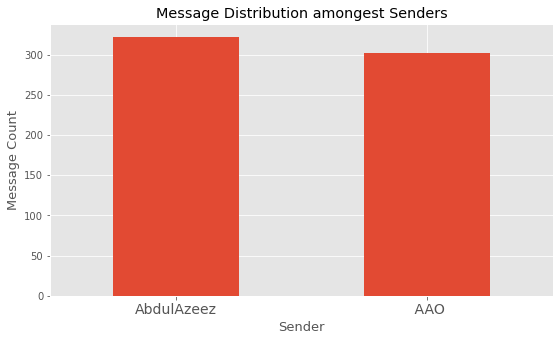

In [57]:
    # which sender sends the most message??
    plt.style.use('ggplot')
    df.Name.value_counts().plot(kind='bar', figsize=(9,5), title='Message Distribution amongest Senders')
    plt.xlabel('Sender', fontsize=13);plt.ylabel('Message Count', fontsize=13); plt.xticks(rotation=0, fontsize=14);plt.show()

You can decide to split the data into a more precise timing like from 6am above can be morning while 12noon to 6pm can be afternoon, 6pm to 12am can be evening or night and 12am to 6am midnight or early morning. This can be done using the Time_of_day column and the time column, you can try it out.

In [128]:
import warnings
warnings.filterwarnings('ignore')
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%m%d%Y %I:%M", errors='ignore')
df.head()

,Date,Time,Name,Content,chat_length,word_count,date_time,clean_content
1,7/7/19,03:14,AAO,Asalam alaikum bro,19,3,7/7/19 03:14,asalam alaikum bro
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...,71,13,7/7/19 03:15,abeg help send time table mobile computing mat...
3,7/7/19,03:15,AAO,Jazakallahu khairan,20,2,7/7/19 03:15,jazakallahu khairan
4,7/7/19,04:21,AbdulAzeez,Walealun. Salam.The time table is no longer o...,60,11,7/7/19 04:21,walealun salamthe time table longer phone sir
5,7/7/19,07:18,AAO,Alright nah,12,2,7/7/19 07:18,alright nah


In [130]:
df['Date'] = pd.to_datetime(df['Date'])

In [184]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [237]:
df['Date'][1]

Timestamp('2019-07-07 00:00:00')

In [244]:
day_name = df['Date'].dt.day_name()
month_name = df['Date'].dt.month_name()
month_name

1          July
2          July
3          July
4          July
5          July
         ...   
680     October
681     October
682     October
684    November
686    December
Name: Date, Length: 622, dtype: object

In [246]:
top25_user = df['Name'].value_counts().index[:25]
top25_user[0]

'AbdulAzeez'

In [161]:
month_mapping = {1:'Jan',
                2:'Feb',
                3:'Mar',
                4:'Apr',
                5:'May',
                6:'Jun',
                7:'Jul',
                8:'Aug',
                9:'Sep',
                10:'Oct',
                11:'Nov',
                12:'Dec'}
day_mapping = {1:'Sun',
              2:'Mon',
              3:'Tue',
              4:'Wed',
              5:'Thu',
              6:'Fri',
              7:'Sat'}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

print(df['day'].unique());
print(df['month'].unique())

['Sat' nan 'Thu' 'Sun' 'Fri']
['Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


In [98]:
# condi = []
# for i in range(len(df)):
#     if int(list(df['date_time'].str.split())[0][-1].split(':')[0] ) == 6 and <= 11:
#         condi.append('Morning')
# #     elif int(list(df['date_time'].sample().str.split())[0][-1].split(':')[0] ) > 11 and <= 15:
# #         condi.append('Afternoon')
# #     elif int(list(df['date_time'].sample().str.split())[0][-1].split(':')[0] ) > 15 and <= 19:
# #         condi.append('Evening')
# #     elif int(list(df['date_time'].sample().str.split())[0][-1].split(':')[0] ) > 19 and <= 23:
# #         condi.append('Night')
# #     else:
# #         condi.append('Midnight')
        
# # len(condi)

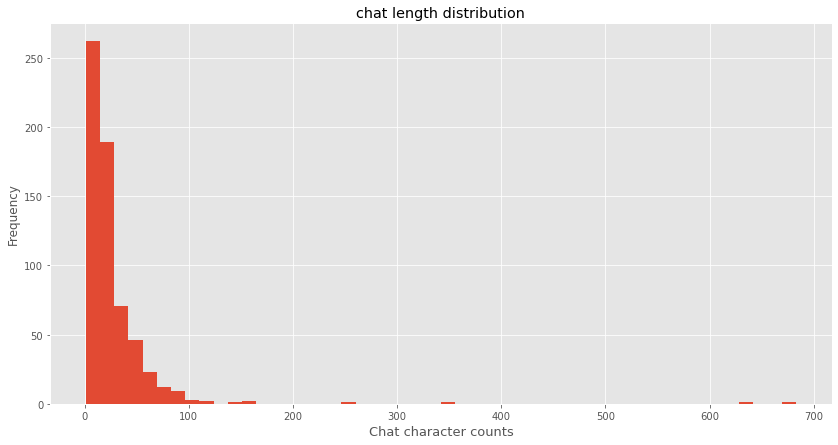

In [100]:
# chart length

df.chat_length.plot.hist(bins=50, figsize=(14, 7), title='chat length distribution')
plt.xlabel('Chat character counts', fontsize=13);plt.show()

Most chat length is between 1 and 100 character long. Good to note that there are some exceptions where chat charcter length crossed 600 characters. AMAZING

I decide to dig deep to find which chat has above 500 characters, maybe a note book just maybe

In [103]:
df[df['chat_length'] >= 500]['Content'].values

array([" Hello, excited to receive this message? Join us for another remarkable moment. . . Want to get started with Kotlin, but don't know where to begin? Join us for our Kotlin/Everywhere event.. . Together we'll work through several Android / Google Cloud / multi-platform labs. You will get hands-on experience with Kotlin in Android, multi-platform with Kotlin/Native, Google Cloud Platform and Kotlin/JS.. . Bring a laptop (PC, Mac or Chromebook). The labs will run on all of the latest versions of the popular browsers. For the best experience, make sure your laptop has Chrome or Firefox installed. Dont forget your charger!. . We have swags and refreshments for attendees. . . Venue",
       " *Suratul Faatiha* protects one from the anger of *Allah.*. *Surah Yaseen* protects one from the thirst of the Day of Judgment. *Suratul Waaqi'ah* protects one from poverty and starvation.. *Surah Mulk* protects one from the punishment of the grave.. *Suratul Kauthar* protects one from the enmity 

In [104]:
# let drop those rows then find the highest value for chat character each user had send
df = df[df['chat_length'] < 500]
df.shape

(622, 7)

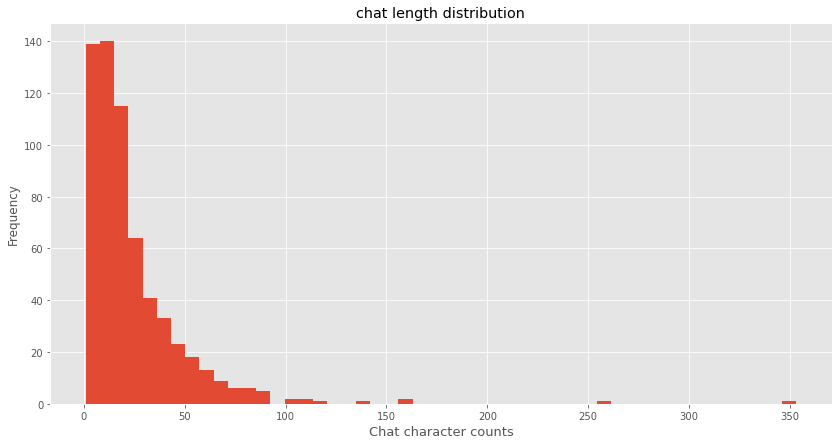

In [105]:
# re-draw the histogram plot

df.chat_length.plot.hist(bins=50, figsize=(14, 7), title='chat length distribution')
plt.xlabel('Chat character counts', fontsize=13);plt.show()

MOst chat character is between 1 and 100 still.

But what is the average and/or median value for chat_values

In [106]:
print("Average character per message", df['chat_length'].mean())

Average character per message 24.5032154340836


In [112]:
# Average per user?
for i in df['Name'].unique():
    print(f"Average character per message for sender {i} is , {df[df['Name'] == i]['chat_length'].mean().round(2)}")

Average character per message for sender  AAO is , 30.78
Average character per message for sender AbdulAzeez is , 18.66


In [168]:
df['Name'].value_counts().index[0]

'AbdulAzeez'

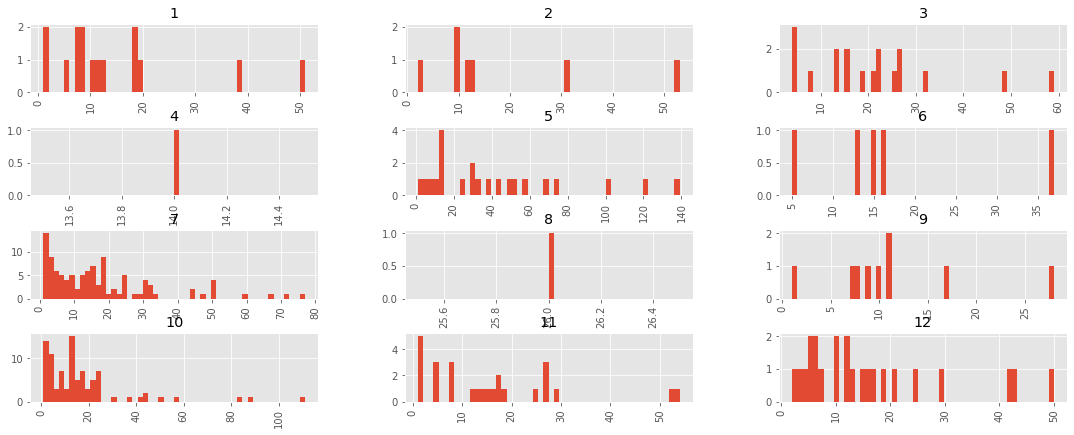

In [135]:
df[df['Name']=='AbdulAzeez'].hist(column='chat_length', by='month', bins=50, figsize=(18,7));

In [181]:
# how many msgs are sent on a monthly basis?
pd.DataFrame(df.groupby('month')['month'].count().sort_values(ascending=False)).rename(columns={'month':'msg_count'})


,msg_count
month,
Jul,192
Oct,173
Nov,53
Dec,53
May,38
Mar,36
Jan,29
Sep,20
Feb,14


In [163]:
# how many msgs per day
pd.DataFrame(df.groupby('day')['day'].size().sort_values(ascending=False))

,day
day,
Sat,36
Sun,27
Fri,11
Thu,3


In [164]:
# year and month
pd.DataFrame(df.groupby(['year', 'month'])['day'].size().sort_values(ascending=False))

day
year month     
2019 Jul    191
     Oct    122
     Nov     52
     Dec     52
2020 Oct     51
     May     38
     Mar     36
     Jan     29
2019 Sep     20
2020 Feb     14
     Jun      9
2019 Aug      3
2020 Apr      2
     Nov      1
     Jul      1
     Dec      1

In [198]:
pd.DataFrame(df.groupby('Date')['Date'].count().reset_index(name='msg_count')).rename(columns={'Date':'new_date'}).nlargest(15, 'msg_count').sort_values(ascending=False, by='msg_count')

,new_date,msg_count
8,2019-07-26,70
3,2019-07-10,45
37,2020-05-10,38
40,2020-10-12,38
21,2019-10-16,33
25,2019-11-07,31
34,2020-03-08,29
20,2019-10-14,27
31,2020-01-11,27
29,2019-12-25,25


In [205]:
import plotly.express as px

date_with_high_traffic = pd.DataFrame(df.groupby('Date')['Date'].count().reset_index(name='msg_count'))\
                    .rename(columns={'Date':'new_date'})
ax = px.line(date_with_high_traffic, x='new_date', y='msg_count', width=900, height=450,
             title='Timeline Trend of chats')
ax

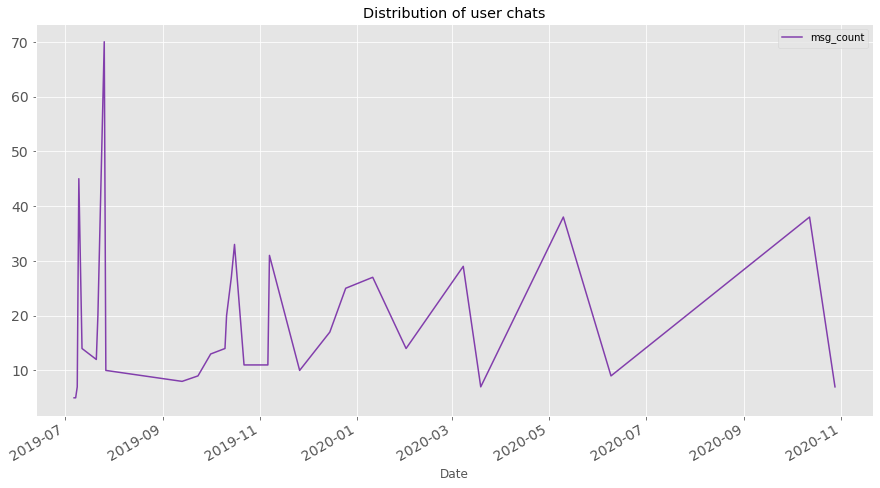

In [201]:
date_with_high_traffic = pd.DataFrame(df.groupby('Date')['Date'].count().nlargest(30)).rename(columns={'Date':'msg_count'})


date_with_high_traffic.plot(kind='line', figsize=(15, 8), title='Distribution of user chats', fontsize=14, color='#823eac')
plt.show()

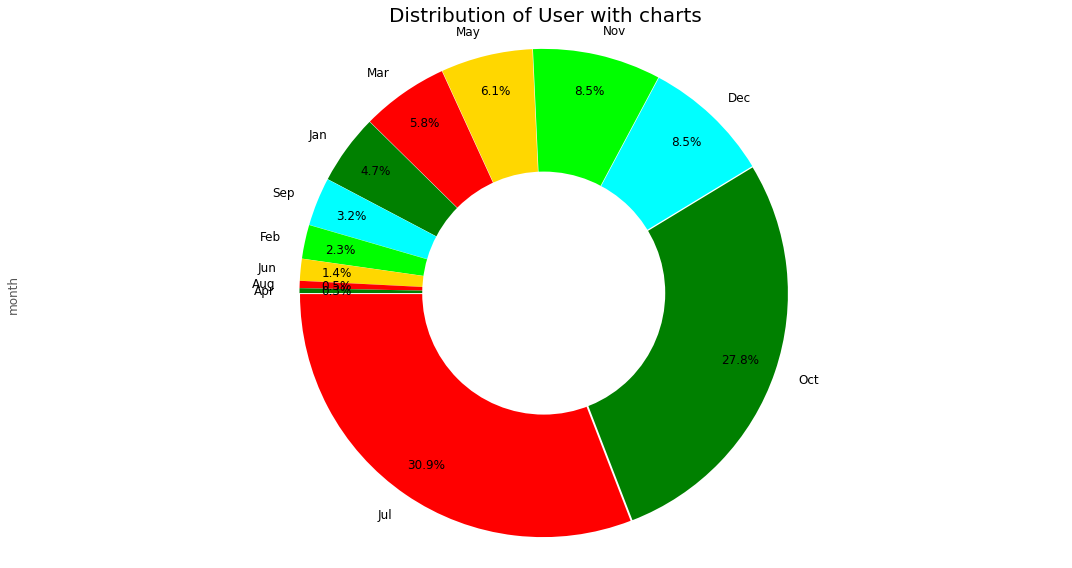

In [167]:
def pie_chart(user):
    fig, ax = plt.subplots(figsize=(15, 8))
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.005)
    ax = user.plot(kind='pie', colors=['red', 'green', 'cyan', 'lime', 'gold'], fontsize=12, autopct='%1.1f%%', startangle=180,
                  pctdistance=0.85, explode=explodex)
    inner_circle = plt.Circle((0,0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')
    ax.set_title('Distribution of User with charts', fontsize=20)
    plt.tight_layout()
    plt.show()
    
month_per_msg = df.groupby('month')['month'].count().nlargest(15)
pie_chart(month_per_msg)

In [250]:
import plotly.graph_objects as go
month_per_msg = df.groupby('month')['month'].count().nlargest(15).reset_index(name='msg_count')
fig = go.Figure(data=[go.Pie(labels=month_per_msg['month'], values=month_per_msg['msg_count'], hole=.3
                             )])
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False, yaxis={'visible':False}, title='Distribution of Users chat for top 15 days')
fig.show()

In [227]:
fig = px.pie(active_hr, values='msg_count', labels='day', width=900, height=700, hole=.2)
fig.show()

In [223]:

active_hr = df.groupby('day')['day'].count().reset_index(name='msg_count')
fig = go.Figure(data=[go.Pie(labels=active_hr['day'], values=active_hr['msg_count'], hole=.3,
                             )])
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False, yaxis={'visible':False}, title='Distribution of Users chat for days')
fig.show()

## Text Preprocessing

In [114]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    clean_message = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(clean_message)

In [115]:
# This will take a while to complete, you can go grab some snack or do some chores
df['clean_content'] = df['Content'].apply(text_process)

In [116]:
# Show transformed dataframe and we can compare columns
df.head()

,Date,Time,Name,Content,chat_length,word_count,date_time,clean_content
1,7/7/19,03:14,AAO,Asalam alaikum bro,19,3,7/7/19 03:14,asalam alaikum bro
2,7/7/19,03:15,AAO,Abeg help me send the time table and mobile c...,71,13,7/7/19 03:15,abeg help send time table mobile computing mat...
3,7/7/19,03:15,AAO,Jazakallahu khairan,20,2,7/7/19 03:15,jazakallahu khairan
4,7/7/19,04:21,AbdulAzeez,Walealun. Salam.The time table is no longer o...,60,11,7/7/19 04:21,walealun salamthe time table longer phone sir
5,7/7/19,07:18,AAO,Alright nah,12,2,7/7/19 07:18,alright nah


In [252]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

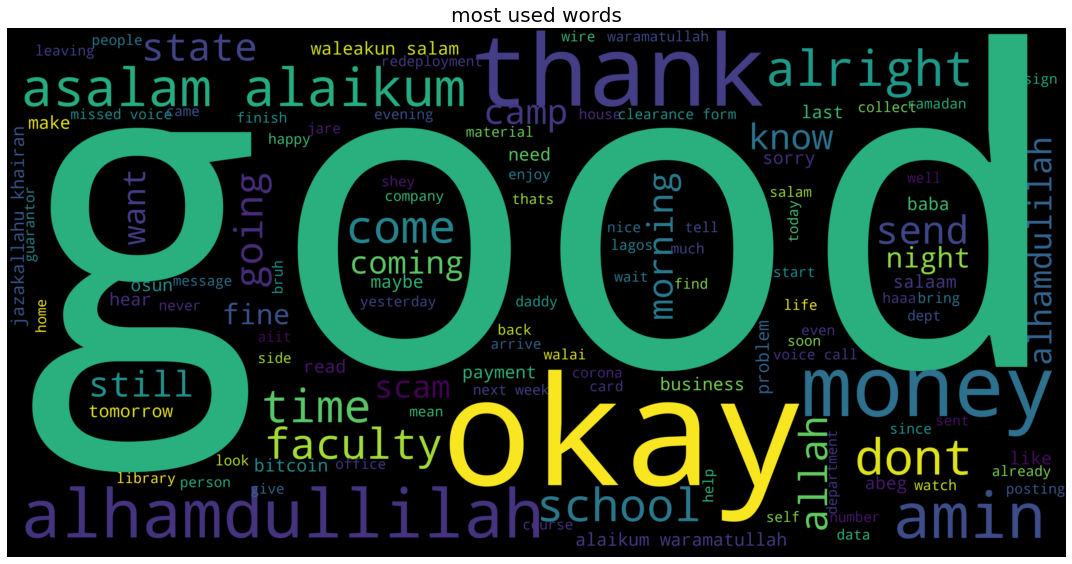

<Figure size 432x288 with 0 Axes>

In [125]:
from wordcloud import WordCloud
def draw_wordcloud(msgs):
# word cloud visualization

    allWords = ' '.join([twts for twts in msgs])
    wordCloud = WordCloud(width=300, height=150, random_state=21, max_words=200, mode='RGBA',
                        max_font_size=140, stopwords=stopwords.words('english'), scale=9,
                          min_word_length=4).generate(allWords)
    plt.figure(figsize=(15, 9))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(); plt.title('most used words', size=20)
    plt.show()
    plt.savefig('masked_wordcloud.jpg')
    
draw_wordcloud(df['clean_content'])

In [268]:
d = pd.read_fwf('WhatsApp Chat with Abdul-Azeez.txt', sep = ' ', header=None)[0].tolist()
type(d)

list

In [281]:
c = pd.read_csv('WhatsApp Chat with Abdul-Azeez.txt', sep = '\t', header=None)[0].tolist()
c

['7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '7/7/19, 03:14 - AAO: Asalam alaikum bro',
 '7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any',
 '7/7/19, 03:15 - AAO: Jazakallahu khairan',
 '7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir',
 '7/7/19, 07:18 - AAO: Alright nah',
 '7/8/19, 17:47 - AAO: Asalam alaikum bro',
 'Please share me muiz contact',
 '7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)',
 '7/8/19, 17:47 - Abdul-Azeez: Waleakun salam',
 '7/8/19, 17:50 - AAO: Jazakallahu khairan',
 '7/8/19, 18:00 - Abdul-Azeez: Waiyakum',
 '7/9/19, 07:12 - AAO: <Media omitted>',
 '7/9/19, 07:12 - AAO: <Media omitted>',
 '7/9/19, 07:13 - Abdul-Azeez: Thanks you sir',
 '7/9/19, 07:13 - Abdul-Azeez: Na wetin me sef go read b this',
 '7/9/19, 07:13 - Abdul-Azeez: Just wake up since last night'

In [271]:
for a in d[:10]:
    print(a)

7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not
7/7/19, 03:14 - AAO: Asalam alaikum bro
7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any
7/7/19, 03:15 - AAO: Jazakallahu khairan
7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir
7/7/19, 07:18 - AAO: Alright nah
7/8/19, 17:47 - AAO: Asalam alaikum bro
Please share me muiz contact
7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)
7/8/19, 17:47 - Abdul-Azeez: Waleakun salam


In [282]:
# merge messages that belong together
msgs = [] #message container
pos = 0 
"""For every line, see if it matches the expression which is starting with the format 'number(s)+slash' eg '12/' if it does, it 
is a new line of conversion as they begin with dates, add it to msgs container.
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line."""

for line in c:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos - 1] + ". "+ line
        msgs.append(take)
        msgs.pop(pos -1)
len(msgs)

688

In [266]:
chat_data

['7/7/19, 03:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '7/7/19, 03:14 - AAO: Asalam alaikum bro',
 '7/7/19, 03:15 - AAO: Abeg help me send the time table and mobile computing materials if any',
 '7/7/19, 03:15 - AAO: Jazakallahu khairan',
 '7/7/19, 04:21 - Abdul-Azeez: Walealun. Salam.The time table is no longer on my phone sir',
 '7/7/19, 07:18 - AAO: Alright nah',
 '7/8/19, 17:47 - AAO: Asalam alaikum bro',
 'Please share me muiz contact',
 '7/8/19, 17:47 - Abdul-Azeez: Muiz.vcf (file attached)',
 '7/8/19, 17:47 - Abdul-Azeez: Waleakun salam',
 '7/8/19, 17:50 - AAO: Jazakallahu khairan',
 '7/8/19, 18:00 - Abdul-Azeez: Waiyakum',
 '7/9/19, 07:12 - AAO: <Media omitted>',
 '7/9/19, 07:12 - AAO: <Media omitted>',
 '7/9/19, 07:13 - Abdul-Azeez: Thanks you sir',
 '7/9/19, 07:13 - Abdul-Azeez: Na wetin me sef go read b this',
 '7/9/19, 07:13 - Abdul-Azeez: Just wake up since last night'